In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import signal
from scipy.io import wavfile
style.use('ggplot')

## الف)

In [2]:
sampleRate, audioBuffer = wavfile.read('SS_HW5/tone.wav')
duration = len(audioBuffer)/sampleRate
t = np.arange(0,duration,1/sampleRate)

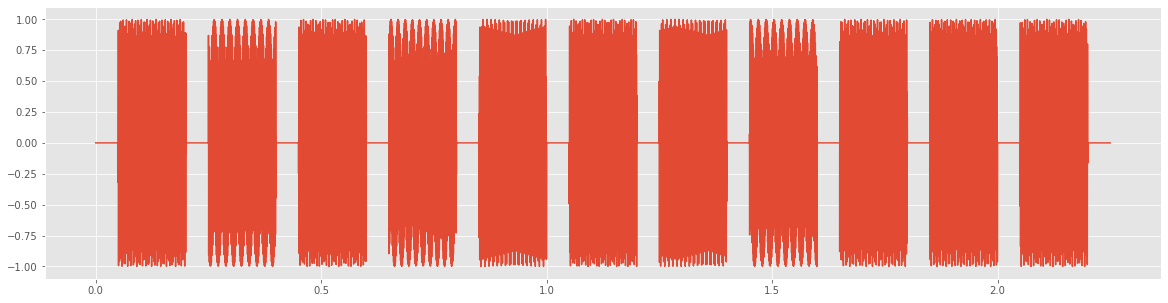

In [3]:
# plot signal in time domain
plt.figure(figsize=(20, 5))
plt.plot(t, audioBuffer)

## ب)

In [4]:
ft = np.fft.fft(audioBuffer)
magnitute = np.abs(ft)
w = np.fft.fftfreq(audioBuffer.size, d=1/sampleRate)

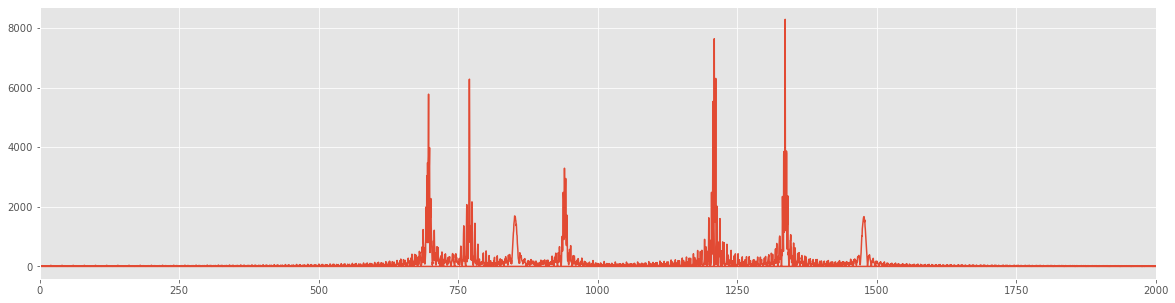

In [5]:
# plot signal in frequency domain
plt.figure(figsize=(20, 5))
plt.xlim([0, 2000])
plt.plot(w, magnitute)

## پ)

In [6]:
# windows size
L = 2048

windows = np.empty((L, int(len(audioBuffer) / L)), dtype="complex_")
ft_windows = np.zeros((L, int(len(audioBuffer) / L)))

#make windows
for j in range(int(len(audioBuffer) / L)):
    windows[:, j] = audioBuffer[L * j : L * (j + 1)]  
    
# fourier transform of windows
for j in range(int(len(audioBuffer) / L)):
    ft_windows[:, j] = abs(np.fft.fft(windows[:,j]))


In [7]:
# removing frequencies more than 2000 and less than 0 (because only frequencies between [0, 2000] are in telephone numbers' freq
w = np.fft.fftfreq(L, d=1/sampleRate)
for i in range(len(w)):
    if w[i] > 2000:
        end_index = i
        break
ft_windows = ft_windows[0:i]

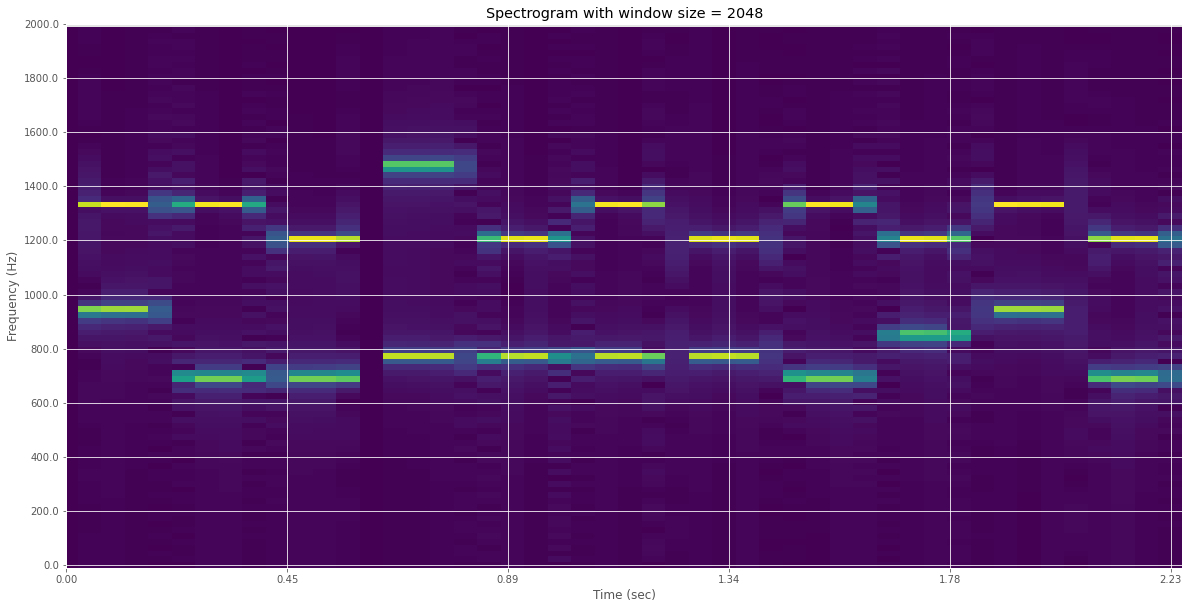

In [8]:
# plot spectogram

plt.figure(figsize=(20,10))

plt_spec = plt.imshow(ft_windows,origin='lower')
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (sec)")
plt.title(f"Spectrogram with window size = {L}")
plt.axis('tight')
plt.xlim(xmin=0) 

## create ylim
Nyticks = 11
ks      = np.linspace(0,ft_windows.shape[0],Nyticks)
plt.yticks(ks, np.linspace(0, 2000,Nyticks))
plt.ylabel("Frequency (Hz)")

## create xlim
Nxticks = 6
ts_spec = np.linspace(0,ft_windows.shape[1] - 1,Nxticks)
ts_spec_sec  = ["{:4.2f}".format(i) for i in np.linspace(0,int(len(audioBuffer) / L) * L /sampleRate,Nxticks)]
plt.xticks(ts_spec, ts_spec_sec)
plt.xlabel("Time (sec)")
# plt.colorbar(plt_spec,use_gridspec=True)

plt.show()

## ت)

# answer: 02164542701

---------------------

## ث)

In [9]:
def spectogram(L):
    sampleRate, audioBuffer = wavfile.read('SS_HW5/tone.wav')
    duration = len(audioBuffer)/sampleRate
    t = np.arange(0,duration,1/sampleRate)
    
    windows = np.empty((L, int(len(audioBuffer) / L)), dtype="complex_")
    ft_windows = np.zeros((L, int(len(audioBuffer) / L)))

    #make windows
    for j in range(int(len(audioBuffer) / L)):
        windows[:, j] = audioBuffer[L * j : L * (j + 1)]  

    # fourier transform of windows
    for j in range(int(len(audioBuffer) / L)):
        ft_windows[:, j] = abs(np.fft.fft(windows[:,j]))
        
    # removing frequencies more than 2000 and less than 0
    w = np.fft.fftfreq(L, d=1/sampleRate)
    for i in range(len(w)):
        if w[i] > 2000:
            end_index = i
            break
    print(f'output of fftfreq = {w}')
    print(f'number of data with frequency less than 2000 = {end_index}')
    
    ft_windows = ft_windows[0:i]
    
    
    # plot spectogram

    plt.figure(figsize=(20,10))

    plt_spec = plt.imshow(ft_windows,origin='lower')
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (sec)")
    plt.title(f"Spectrogram with window size = {L}")
    plt.axis('tight')
    plt.xlim(xmin=0) 

    ## create ylim
    Nyticks = 11
    ks      = np.linspace(0,ft_windows.shape[0],Nyticks)
    plt.yticks(ks, np.linspace(0, 2000,Nyticks))
    plt.ylabel("Frequency (Hz)")

    ## create xlim
    Nxticks = 6
    ts_spec = np.linspace(0,ft_windows.shape[1] - 1,Nxticks)
    ts_spec_sec  = ["{:4.2f}".format(i) for i in np.linspace(0,int(len(audioBuffer) / L) * L /sampleRate,Nxticks)]
    plt.xticks(ts_spec, ts_spec_sec)
    plt.xlabel("Time (sec)")
#     plt.colorbar(plt_spec,use_gridspec=True)

    plt.show()


output of fftfreq = [   0.           43.06640625   86.1328125  ... -129.19921875  -86.1328125
  -43.06640625]
number of data with frequency less than 2000 = 47


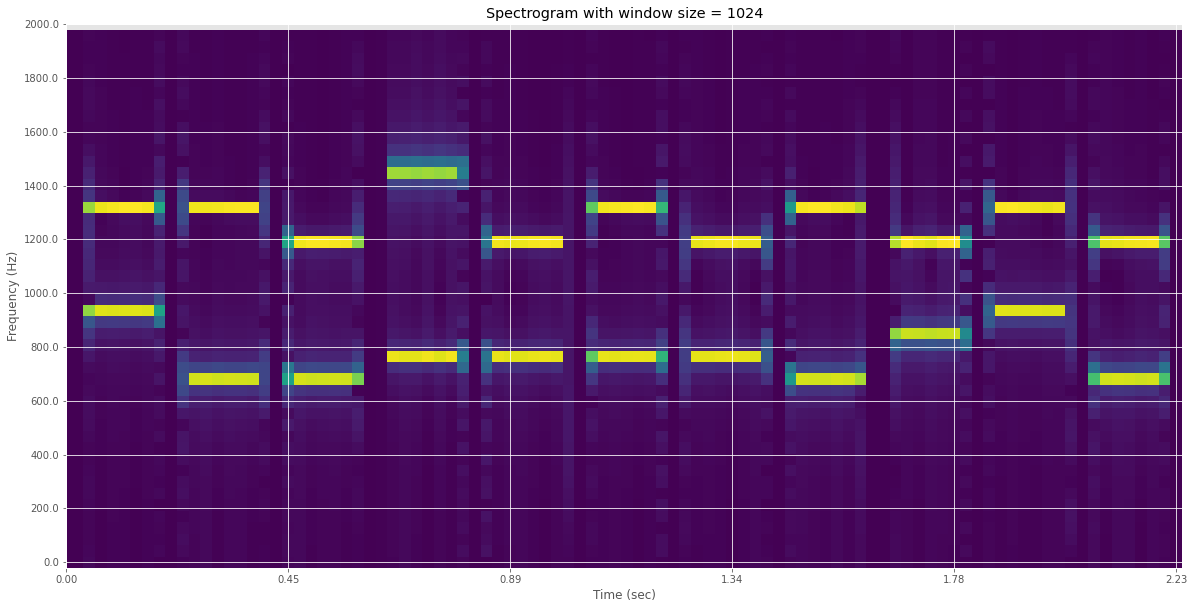

In [10]:
spectogram(1024)

output of fftfreq = [  0.          10.76660156  21.53320312 ... -32.29980469 -21.53320312
 -10.76660156]
number of data with frequency less than 2000 = 186


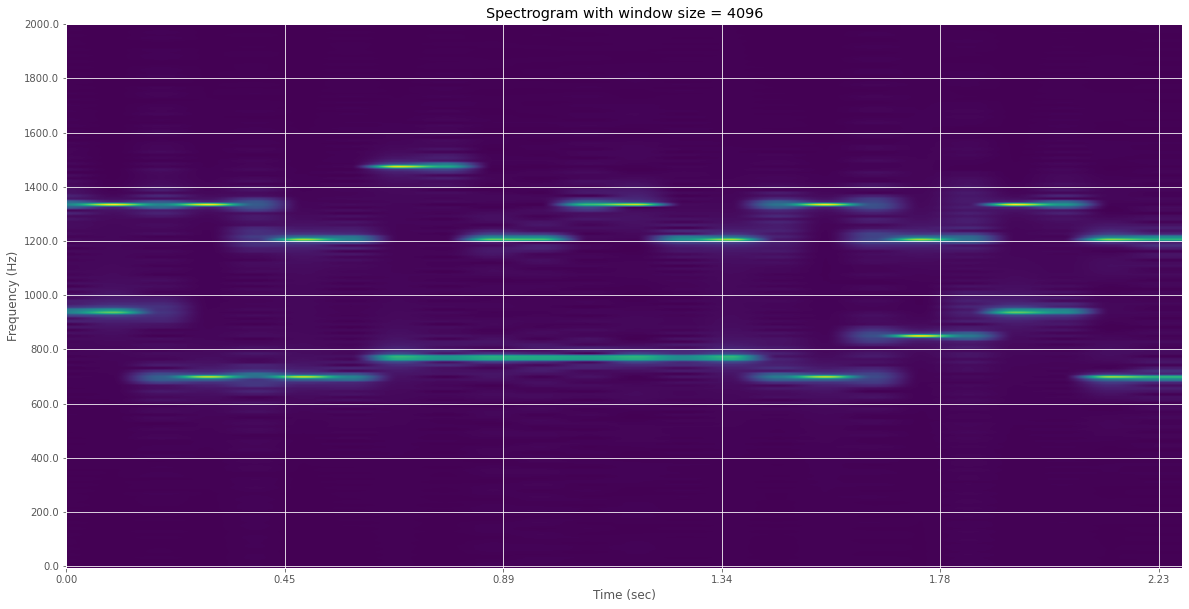

In [11]:
spectogram(4096)

### time resolusion = window size / sample rate

### freq resolusion = sample rate / window size

رزولوشن در محور زمان و فرکانس از رابطه های بالا بدست می آید پس هرچه اندازه پنجره زمانی بیشتر شود، محور فرکانس دقیق تر و در محور زمان دقت کمتر میشود و با کاهش اندازه زمانی برعکس.
پس در اینجا برای پنجره های زمانی 1024 تایی دقت در زمان بیشتر بوده و برای نمودار مربوط به پنجره های زمانی 4098 تایی دقت در محور فرکانس بیشتر میشود زیرا همان طور که مشاهده میشود تعداد فرکانس هایی که در محدوده معتبر قرار دارند نیز با افزایش اندازه پنجره زمانی بیشتر میشود و دقت در حوزه فرکانس بالاتر میرود